In [18]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
  
# fetch dataset 
wineQuality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
features = wineQuality.data.features 
labels = wineQuality.data.targets 
original = wineQuality.data.original
  
# # metadata 
# print(wineQuality.metadata) 
  
# # variable information 
# print(wineQuality.variables) 




### PCA Calculations

In [19]:
features

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [20]:
featuresStandardized = StandardScaler().fit_transform(features)

In [21]:
from sklearn.decomposition import PCA

pca2Comp = PCA(n_components=2)
principalComponents2 = pca2Comp.fit_transform(featuresStandardized)

pca5Comp = PCA(n_components=5)
principalComponents5 = pca5Comp.fit_transform(featuresStandardized)

pca7Comp = PCA(n_components=7)
principalComponents7 = pca7Comp.fit_transform(featuresStandardized)

In [22]:
principalDf = pd.DataFrame(data=principalComponents2
             , columns =['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, labels], axis = 1)

In [23]:
finalDf

,principal component 1,principal component 2,quality
0,-3.205996,0.416523,5
1,-3.039051,1.107462,5
2,-3.071893,0.878964,5
3,-1.571262,2.112545,6
4,-3.205996,0.416523,5
...,...,...,...
6492,-0.062824,-1.934205,6
6493,1.866989,0.524431,5
6494,0.571133,-0.722662,6
6495,0.090052,-3.545780,7


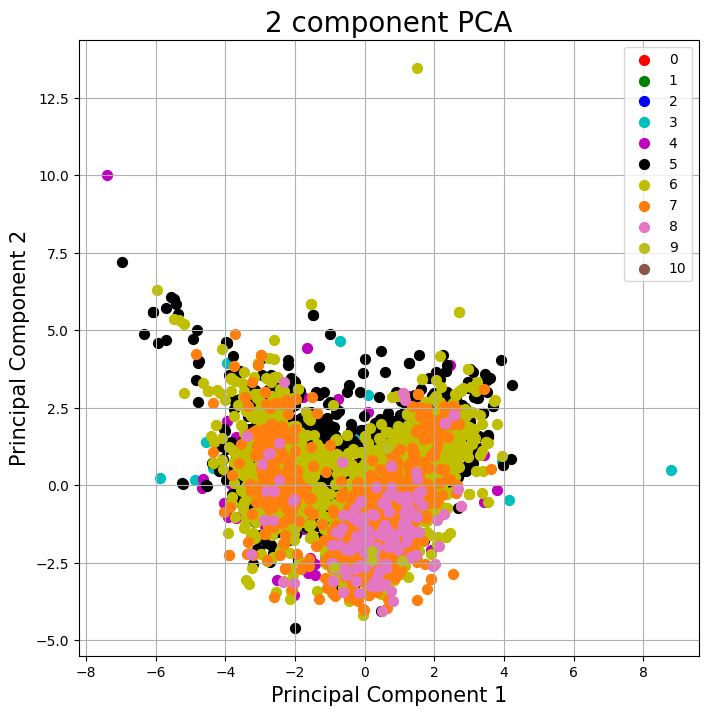

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
colors = ['r', 'g', 'b', 'c', 'm', 'k', 'y', 'tab:orange', 'tab:pink', 'tab:olive', 'tab:brown']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Decision Tree Creation

In [25]:
# Seperate into training data and testing data
trainFeatures = wineQuality.data.features.sample(frac=0.8, random_state=200)
trainLabels = wineQuality.data.targets.sample(frac=0.8, random_state=200)

testFeatures = wineQuality.data.features.drop(trainFeatures.index)
testLabels = wineQuality.data.targets.drop(trainLabels.index)

In [26]:
# Need to create decision trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


dtree = DecisionTreeClassifier()
dtree = dtree.fit(trainFeatures, trainLabels)

tree.plot_tree(dtree, feature_names=trainFeatures.columns) 

[Text(0.4779611702819534, 0.9807692307692307, 'alcohol <= 10.35\ngini = 0.672\nsamples = 5198\nvalue = [23.0, 183.0, 1738.0, 2253.0, 840.0, 157.0, 4.0]'),
 Text(0.24505178024658458, 0.9423076923076923, 'volatile_acidity <= 0.265\ngini = 0.592\nsamples = 2647\nvalue = [10.0, 113.0, 1337.0, 1017.0, 151.0, 19.0, 0.0]'),
 Text(0.14308829081281182, 0.9038461538461539, 'residual_sugar <= 17.7\ngini = 0.612\nsamples = 1001\nvalue = [4, 20, 325, 519, 116, 17, 0]'),
 Text(0.11406844843151757, 0.8653846153846154, 'alcohol <= 10.05\ngini = 0.607\nsamples = 962\nvalue = [4, 20, 297, 512, 112, 17, 0]'),
 Text(0.07603108412373825, 0.8269230769230769, 'density <= 0.998\ngini = 0.611\nsamples = 799\nvalue = [3, 14, 274, 407, 84, 17, 0]'),
 Text(0.03432809236860425, 0.7884615384615384, 'alcohol <= 9.35\ngini = 0.57\nsamples = 570\nvalue = [1, 12, 217, 302, 34, 4, 0]'),
 Text(0.008028773639633368, 0.75, 'pH <= 2.935\ngini = 0.57\nsamples = 163\nvalue = [1, 4, 82, 68, 7, 1, 0]'),
 Text(0.0025989093862397

Error in callback <function flush_figures at 0x000002276B71DC60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
testPredictedLabels = dtree.predict(testFeatures)

In [ ]:
from sklearn import metrics
# print("Accuracy: ", metrics.accuracy_score(testPredictedLabels, testLabels))
correctCount = 0
for i, label in enumerate(testPredictedLabels.tolist()):
    print(testLabels[i])
    if label - 1 >= testLabels[i] and label + 1 <= testLabels[i]:
        correctCount += 1
print("Accuracy: " + str( correctCount / len(testPredictedLabels)))

KeyError: 0

In [ ]:
dtreeLimitDepth = DecisionTreeClassifier(max_depth=20)
dtreeLimitDepth = dtreeLimitDepth.fit(trainFeatures, trainLabels )

In [ ]:
testPredictedLabelsDepthLimited = dtreeLimitDepth.predict(testFeatures)
print("Accuracy: ", metrics.accuracy_score(testPredictedLabelsDepthLimited, testLabels))

Accuracy:  0.6158583525789069


### Decision Tree for Wine Color

In [ ]:
featuresWineColor = original

colorLabel = featuresWineColor.loc[:, "color"]

featuresWineColor = featuresWineColor.drop(columns=['color'])

# featuresWineColor.drop(['color'])
trainingWineColor = featuresWineColor.sample(frac=0.8, random_state=200)
trainingWineLabels = colorLabel.sample(frac=0.8, random_state=200)

testingWineColor = featuresWineColor.drop(trainingWineColor.index)
testingWineLabels = colorLabel.drop(trainingWineLabels.index)
# colorLabel

[Text(0.4672897196261682, 0.9761904761904762, 'total_sulfur_dioxide <= 67.5\ngini = 0.373\nsamples = 5198\nvalue = [1291, 3907]'),
 Text(0.14953271028037382, 0.9285714285714286, 'chlorides <= 0.046\ngini = 0.177\nsamples = 1131\nvalue = [1020, 111]'),
 Text(0.07476635514018691, 0.8809523809523809, 'sulphates <= 0.55\ngini = 0.23\nsamples = 113\nvalue = [15.0, 98.0]'),
 Text(0.037383177570093455, 0.8333333333333334, 'volatile_acidity <= 0.657\ngini = 0.044\nsamples = 88\nvalue = [2, 86]'),
 Text(0.018691588785046728, 0.7857142857142857, 'gini = 0.0\nsamples = 84\nvalue = [0, 84]'),
 Text(0.056074766355140186, 0.7857142857142857, 'citric_acid <= 0.085\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.037383177570093455, 0.7380952380952381, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.07476635514018691, 0.7380952380952381, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.11214953271028037, 0.8333333333333334, 'volatile_acidity <= 0.21\ngini = 0.499\nsamples = 25\nvalue = [13, 

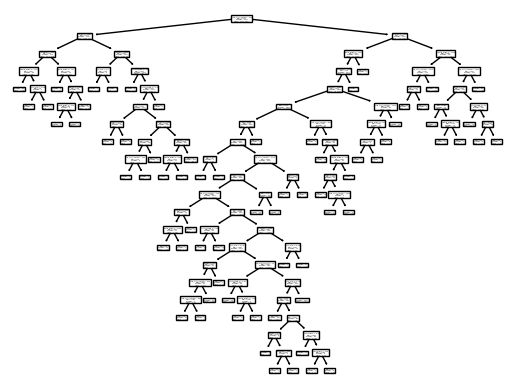

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtreeColor = DecisionTreeClassifier()
dtreeColor = dtreeColor.fit(trainingWineColor, trainingWineLabels)

tree.plot_tree(dtreeColor, feature_names=trainingWineColor.columns) 

In [ ]:
from sklearn import metrics

testPredictedLabels = dtreeColor.predict(testingWineColor)

### 
print("Accuracy: ", metrics.accuracy_score(testPredictedLabels, testingWineLabels))

Accuracy:  0.9899923017705927


### Clustering

In [29]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.3, min_samples=6).fit(features)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 6443


In [30]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = features[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = features[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

InvalidIndexError: (slice(None, None, None), 0)